In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from subprocess import call
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# load classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Hierarchical Cluster
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/Problem6_kepler.csv")
df.head(10)

,koi_period,koi_eccen,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_incl,koi_teq,koi_insol,koi_dor,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,label
0,9.488036,0,0.146,2.95750,615.8,0.022344,3.20796,2.26,89.66,793,93.59,24.8100,5455,4.467,0.14,0.927,0.919,CONFIRMED
1,54.418383,0,0.586,4.50700,874.8,0.027954,3.02368,2.83,89.57,443,9.11,77.9000,5455,4.467,0.14,0.927,0.919,CONFIRMED
2,1.736952,0,1.276,2.40641,8079.2,0.387394,0.22080,33.46,67.09,1395,891.96,3.2780,5805,4.564,-0.52,0.791,0.836,FALSE POSITIVE
3,2.525592,0,0.701,1.65450,603.3,0.024064,1.98635,2.75,85.41,1406,926.16,8.7500,6031,4.438,0.07,1.046,1.095,CONFIRMED
4,11.094321,0,0.538,4.59450,1517.5,0.036779,0.67324,3.90,88.11,835,114.81,16.3600,6046,4.486,-0.08,0.972,1.053,CONFIRMED
5,4.134435,0,0.762,3.14020,686.0,0.026133,0.37377,2.77,83.72,1160,427.65,6.9600,6046,4.486,-0.08,0.972,1.053,CONFIRMED
6,2.566589,0,0.755,2.42900,226.5,0.014983,0.48909,1.59,82.17,1360,807.74,5.5400,6046,4.486,-0.08,0.972,1.053,CONFIRMED
7,7.361790,0,1.169,5.02200,233.7,0.183387,0.00485,39.21,60.92,1342,767.22,2.4000,6227,3.986,0.00,1.958,1.358,FALSE POSITIVE
8,16.068647,0,0.052,3.53470,4914.3,0.062161,3.66590,5.76,89.92,600,30.75,36.8500,5031,4.485,0.16,0.848,0.801,CONFIRMED
9,2.470613,0,0.818,1.74319,14231.0,0.123871,1.83538,13.04,84.41,1339,761.46,8.3977,5820,4.457,-0.06,0.964,0.971,CONFIRMED


In [ ]:
df.shape[0]

6859

In [ ]:
df.shape[1]

18

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6859 entries, 0 to 6858
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   koi_period    6859 non-null   float64
 1   koi_eccen     6859 non-null   int64  
 2   koi_impact    6859 non-null   float64
 3   koi_duration  6859 non-null   float64
 4   koi_depth     6859 non-null   float64
 5   koi_ror       6859 non-null   float64
 6   koi_srho      6859 non-null   float64
 7   koi_prad      6859 non-null   float64
 8   koi_incl      6859 non-null   float64
 9   koi_teq       6859 non-null   int64  
 10  koi_insol     6859 non-null   float64
 11  koi_dor       6859 non-null   float64
 12  koi_steff     6859 non-null   int64  
 13  koi_slogg     6859 non-null   float64
 14  koi_smet      6859 non-null   float64
 15  koi_srad      6859 non-null   float64
 16  koi_smass     6859 non-null   float64
 17  label         6859 non-null   object 
dtypes: float64(14), int64(3), ob

In [ ]:
df.describe(percentiles = [0.25, .5, .75, .98, .995]).T

,count,mean,std,min,25%,50%,75%,98%,99.5%,max
koi_period,6859.0,50.802552,112.514402,0.241843,2.113200,7.442652,27.501373,451.498902,585.792090,1.071233e+03
koi_eccen,6859.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
koi_impact,6859.0,0.763171,3.202515,0.000000,0.233000,0.592000,0.922000,1.321000,6.263150,1.008060e+02
koi_duration,6859.0,5.851431,7.010665,0.104600,2.537900,3.908510,6.349000,24.823600,44.064316,1.385400e+02
koi_depth,6859.0,31492.334801,93901.080455,0.800000,181.950000,512.600000,3031.550000,378524.400000,537531.000000,1.541400e+06
koi_ror,6859.0,0.301801,3.161527,0.001289,0.013205,0.024527,0.219765,0.730086,5.416860,9.987065e+01
koi_srho,6859.0,6.937126,48.142150,0.000040,0.177695,0.759530,2.388495,55.520674,225.150945,9.808542e+02
koi_prad,6859.0,109.925798,3285.746711,0.080000,1.510000,2.710000,26.815000,197.678800,841.379400,2.003460e+05
koi_incl,6859.0,80.812588,16.805754,2.290000,81.370000,87.890000,89.620000,89.990000,90.000000,9.000000e+01
koi_teq,6859.0,1177.652865,918.611871,92.000000,583.500000,955.000000,1531.000000,3535.840000,5304.300000,1.466700e+04


In [ ]:
df.describe()

,koi_period,koi_eccen,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_incl,koi_teq,koi_insol,koi_dor,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass
count,6859.000000,6859.0,6859.000000,6859.000000,6.859000e+03,6859.000000,6859.000000,6859.000000,6859.000000,6859.000000,6.859000e+03,6859.000000,6859.000000,6859.000000,6859.000000,6859.000000,6859.000000
mean,50.802552,0.0,0.763171,5.851431,3.149233e+04,0.301801,6.937126,109.925798,80.812588,1177.652865,9.896534e+03,55.333815,5729.771104,4.303690,-0.135740,1.775348,1.028504
std,112.514402,0.0,3.202515,7.010665,9.390108e+04,3.161527,48.142150,3285.746711,16.805754,918.611871,1.844842e+05,147.003395,829.106486,0.445014,0.284711,6.118170,0.359452
min,0.241843,0.0,0.000000,0.104600,8.000000e-01,0.001289,0.000040,0.080000,2.290000,92.000000,2.000000e-02,0.386000,2661.000000,0.047000,-2.500000,0.116000,0.094000
25%,2.113200,0.0,0.233000,2.537900,1.819500e+02,0.013205,0.177695,1.510000,81.370000,583.500000,2.739000e+01,4.052500,5325.000000,4.204000,-0.280000,0.830000,0.844000
50%,7.442652,0.0,0.592000,3.908510,5.126000e+02,0.024527,0.759530,2.710000,87.890000,955.000000,1.965100e+02,12.220000,5780.000000,4.438000,-0.100000,1.000000,0.974000
75%,27.501373,0.0,0.922000,6.349000,3.031550e+03,0.219765,2.388495,26.815000,89.620000,1531.000000,1.297855e+03,34.700000,6130.500000,4.542000,0.060000,1.368000,1.104000
max,1071.232624,0.0,100.806000,138.540000,1.541400e+06,99.870651,980.854190,200346.000000,90.000000,14667.000000,1.094755e+07,2421.700000,15896.000000,5.283000,0.560000,229.908000,3.686000


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum().sum()

0

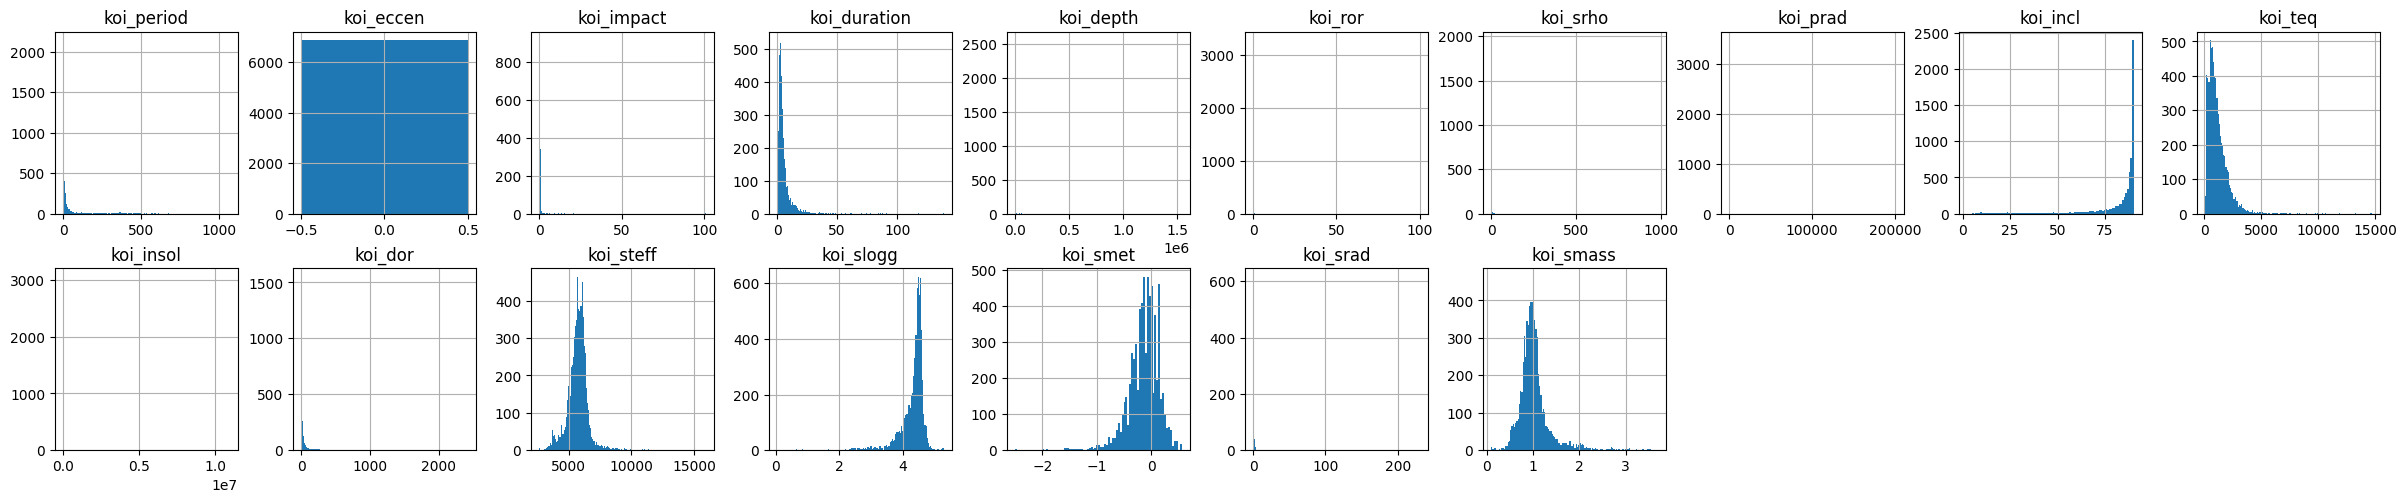

In [ ]:
df.hist(figsize=(30,30), bins='auto', layout=(10, 10), xlabelsize=10, ylabelsize=10)
plt.show()

In [ ]:
df['label'].value_counts()

,count
label,
FALSE POSITIVE,4563
CONFIRMED,2296


In [ ]:
y = np.where(df['label'] == 'CONFIRMED', 1,0)
X = df.drop(['label'], axis = 1)

In [ ]:
scaler = MinMaxScaler()
scaler.fit_transform(X)
X_Transformed = scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Transformed, y, test_size=0.2, random_state=42)

In [ ]:
#Build model logistic regression
paramslr = {'penalty':['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10]}

lr = LogisticRegression(solver='liblinear', random_state=42)
CV_lr = GridSearchCV(lr, paramslr, cv=5, n_jobs= 5, verbose= 1)
CV_lr.fit(X_train, y_train)

best_params = CV_lr.best_params_

y_pred = CV_lr.predict_proba(X_test).T[1]
accuracy_score_lr = accuracy_score(y_test, CV_lr.predict(X_test))
f1_score_lr = f1_score(y_test, CV_lr.predict(X_test))
roc_auc_score_lr = roc_auc_score(y_test, y_pred)
print("Best hyperparameters found by GridSearchCV:", best_params)
print('Accuracy score\t', accuracy_score_lr)
print('F1 score\t', f1_score_lr)
print('ROC\t', roc_auc_score_lr)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters found by GridSearchCV: {'C': 10, 'penalty': 'l1'}
Accuracy score	 0.8746355685131195
F1 score	 0.8252032520325203
ROC	 0.9419138418079096


In [ ]:
#Decision Tree Classifier
paramsDTC = {'min_samples_leaf' :[1, 5, 10, 15, 20]}

dct = DecisionTreeClassifier(random_state = 42)
CV_dct = GridSearchCV(dct, paramsDTC, cv=5, n_jobs= 5, verbose= 1)
CV_dct.fit(X_train, y_train)

best_params = CV_dct.best_params_

y_pred = CV_dct.predict_proba(X_test).T[1]
accuracy_score_dct = accuracy_score(y_test, CV_dct.predict(X_test))
f1_score_dct = f1_score(y_test, CV_dct.predict(X_test))
roc_auc_score_dct = roc_auc_score(y_test, y_pred)
print("Best hyperparameters found by GridSearchCV:", best_params)
print('Accuracy score\t', accuracy_score_dct)
print('F1 score\t', f1_score_dct)
print('ROC\t', roc_auc_score_dct)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters found by GridSearchCV: {'min_samples_leaf': 20}
Accuracy score	 0.8833819241982507
F1 score	 0.8297872340425532
ROC	 0.9412064500941619


In [ ]:
#Random Forest Classifier
paramsRFC = {'n_estimators': [10, 20, 30, 40, 50], 'min_samples_leaf' :[1, 5, 10, 15, 20]}
rfc = RandomForestClassifier(random_state= 42)
CV_rfc = GridSearchCV(rfc, paramsRFC, cv=5, n_jobs= 5, verbose= 1)
CV_rfc.fit(X_train, y_train)

y_pred = CV_rfc.predict_proba(X_test).T[1]
accuracy_score_rfc = accuracy_score(y_test, CV_rfc.predict(X_test))
f1_score_rfc = f1_score(y_test, CV_rfc.predict(X_test))
roc_auc_score_rfc = roc_auc_score(y_test, y_pred)
print('Accuracy score\t', accuracy_score_rfc)
print('F1 score\t', f1_score_rfc)
print('ROC\t', roc_auc_score_rfc)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Accuracy score	 0.9256559766763849
F1 score	 0.8924050632911392
ROC	 0.9712488229755178


In [ ]:
#Adaboost Classifier
paramsabc = {'n_estimators': np.arange(10,51,10), 'learning_rate': np.arange(0.5, 1.0, 0.1)}

abc = AdaBoostClassifier(random_state= 42)
CV_abc = GridSearchCV(abc, paramsabc, cv=5, n_jobs= 5, verbose= 1)
CV_abc.fit(X_train, y_train)

y_pred = CV_abc.predict_proba(X_test).T[1]
accuracy_score_abc = accuracy_score(y_test, CV_abc.predict(X_test))
f1_score_abc = f1_score(y_test, CV_abc.predict(X_test))
roc_auc_score_abc = roc_auc_score(y_test, y_pred)
print('Accuracy score\t', accuracy_score_abc)
print('F1 score\t', f1_score_abc)
print('ROC\t', roc_auc_score_abc)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy score	 0.8957725947521866
F1 score	 0.8533333333333334
ROC	 0.9602083333333333


In [ ]:
#XGBoost Classifier
paramsxgbc = {'n_estimators': np.arange(10,51,10), 'learning_rate': np.arange(0.5, 1.0, 0.1)}

xgbc = XGBClassifier(random_state= 42)
CV_xgbc = GridSearchCV(xgbc, paramsxgbc, cv=5, n_jobs= 5, verbose= 1)
CV_xgbc.fit(X_train, y_train)

y_pred = CV_xgbc.predict_proba(X_test).T[1]
accuracy_score_xgbc = accuracy_score(y_test, CV_xgbc.predict(X_test))
f1_score_xgbc = f1_score(y_test, CV_xgbc.predict(X_test))
roc_auc_score_xgbc = roc_auc_score(y_test, y_pred)
print('Accuracy score\t', accuracy_score_xgbc)
print('F1 score\t', f1_score_xgbc)
print('ROC\t', roc_auc_score_xgbc)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Accuracy score	 0.9190962099125365
F1 score	 0.8840125391849529
ROC	 0.9722151600753296


In [ ]:
accurary_score = [accuracy_score_lr, accuracy_score_dct, accuracy_score_rfc, accuracy_score_abc, accuracy_score_xgbc]
f1_score = [f1_score_lr, f1_score_dct, f1_score_rfc, f1_score_abc, f1_score_xgbc]
roc_auc_score = [roc_auc_score_lr, roc_auc_score_dct, roc_auc_score_rfc, roc_auc_score_abc, roc_auc_score_xgbc]


TypeError: unsupported operand type(s) for +: 'int' and 'function'

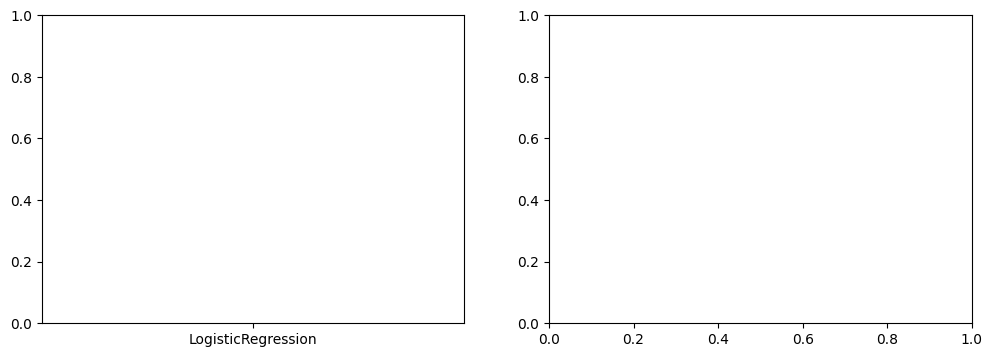

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Create a figure with 1 row and 2 columns

# Plot the first chart (Accuracy scores)
axs[0].bar(['LogisticRegression', 'Decision Tree Classifier', 'Random Forest Classifier', 'AdaBoost Classifier', 'XGBoost Classifier'], accuracy_score, color='skyblue')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Accuracy Score')
axs[0].set_title('Accuracy Scores for Different Models')
axs[0].tick_params(axis='x', rotation=45)

# Plot the second chart (F1 scores)
axs[1].bar(['LogisticRegression', 'Decision Tree Classifier', 'Random Forest Classifier', 'AdaBoost Classifier', 'XGBoost Classifier'], f1_score, color='lightgreen')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('F1 Score')
axs[1].set_title('F1 Scores for Different Models')
axs[1].tick_params(axis='x', rotation=45)

# Plot the third chart (ROC_AUC scores)
axs[2].bar(['LogisticRegression', 'Decision Tree Classifier', 'Random Forest Classifier', 'AdaBoost Classifier', 'XGBoost Classifier'], roc_auc_score, color='red')
axs[2].set_xlabel('Model')
axs[2].set_ylabel('ROC_AUC Score')
axs[2].set_title('ROC_AUC Scores for Different Models')
axs[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

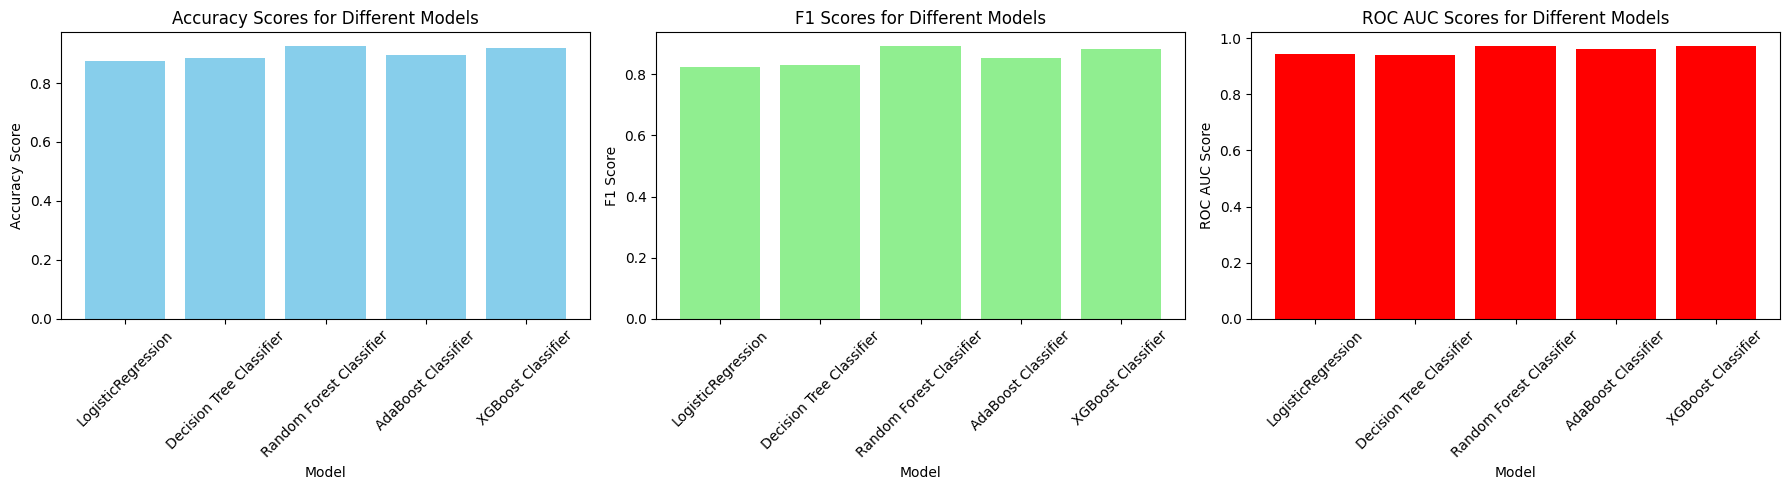

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 3 columns for the subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # Adjust figsize as needed

# Plot the first chart (Accuracy scores)
axs[0].bar(['LogisticRegression', 'Decision Tree Classifier', 'Random Forest Classifier', 'AdaBoost Classifier', 'XGBoost Classifier'],
           accuracy_scores, color='skyblue')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Accuracy Score')
axs[0].set_title('Accuracy Scores for Different Models')
axs[0].tick_params(axis='x', rotation=45)

# Plot the second chart (F1 scores)
axs[1].bar(['LogisticRegression', 'Decision Tree Classifier', 'Random Forest Classifier', 'AdaBoost Classifier', 'XGBoost Classifier'],
           f1_scores, color='lightgreen')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('F1 Score')
axs[1].set_title('F1 Scores for Different Models')
axs[1].tick_params(axis='x', rotation=45)

# Plot the third chart (ROC AUC scores)
axs[2].bar(['LogisticRegression', 'Decision Tree Classifier', 'Random Forest Classifier', 'AdaBoost Classifier', 'XGBoost Classifier'],
           roc_auc_scores, color='red')
axs[2].set_xlabel('Model')
axs[2].set_ylabel('ROC AUC Score')
axs[2].set_title('ROC AUC Scores for Different Models')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Optimal number of features: 9


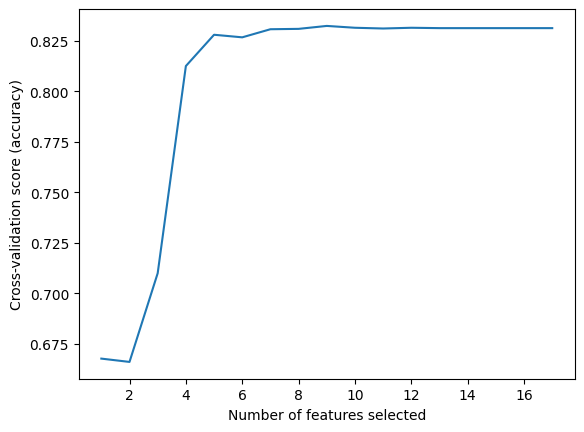

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Define your estimator (Logistic Regression in this case)
model = LogisticRegression(solver='liblinear')

# Create RFECV object, which will select the optimal number of features based on cross-validation
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit the RFECV model
rfecv.fit(X_train, y_train)

# Get the optimal number of features
optimal_num_features = rfecv.n_features_
print("Optimal number of features:", optimal_num_features)

# Plot the number of features vs cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")

# Access the mean test scores via cv_results_
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()
